In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [50]:
X, y = make_moons(n_samples=500, noise=0.08)

In [51]:
print(X.shape, y.shape)

(500, 2) (500,)


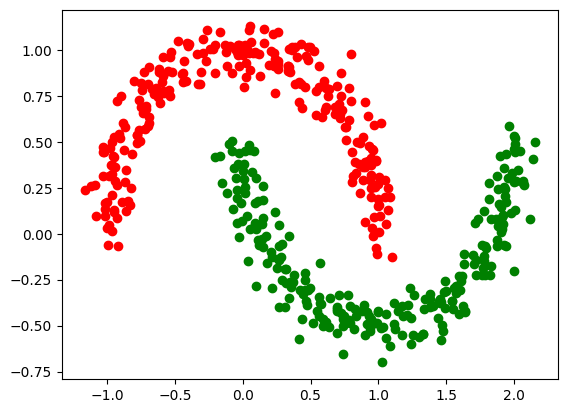

In [52]:
plt.scatter(X[y==1, 0], X[y==1, 1], c='green')
plt.scatter(X[y==0, 0], X[y==0, 1], c='red');

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [54]:
lgr = LogisticRegression()
lgr.fit(X, y)

LogisticRegression()

In [55]:
steps = [('poly_feature', PolynomialFeatures(degree=2)),
         ('lgr', LogisticRegression(fit_intercept=False))]

poly_lgr = Pipeline(steps=steps)

poly_lgr.fit(X, y)

Pipeline(steps=[('poly_feature', PolynomialFeatures()),
                ('lgr', LogisticRegression(fit_intercept=False))])

In [56]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

In [57]:
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                     np.linspace(x2_min, x2_max, 500))

X_input = np.c_[xx.reshape(-1), yy.reshape(-1)]

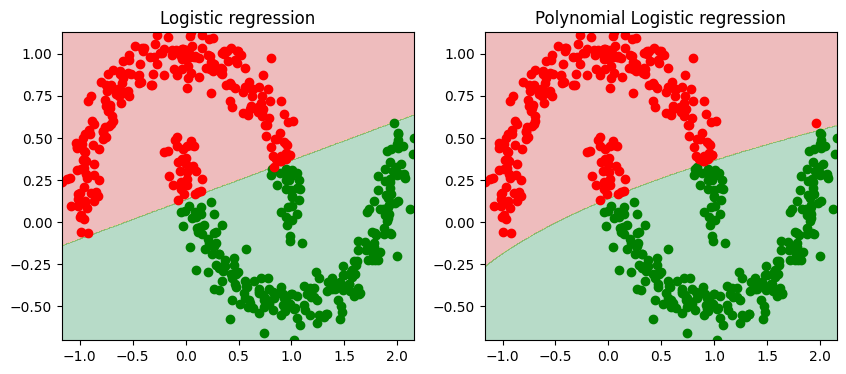

In [58]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Logistic regression')
plt.contourf(xx, yy, lgr.predict(X=X_input).reshape((500, 500)), cmap='RdYlGn', alpha=0.3)
y_pred = lgr.predict(X=X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='green')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='red')

plt.subplot(122)
plt.title('Polynomial Logistic regression')
plt.contourf(xx, yy, poly_lgr.predict(X=X_input).reshape((500, 500)), cmap='RdYlGn', alpha=0.3)
y_pred = poly_lgr.predict(X=X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='green')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='red');

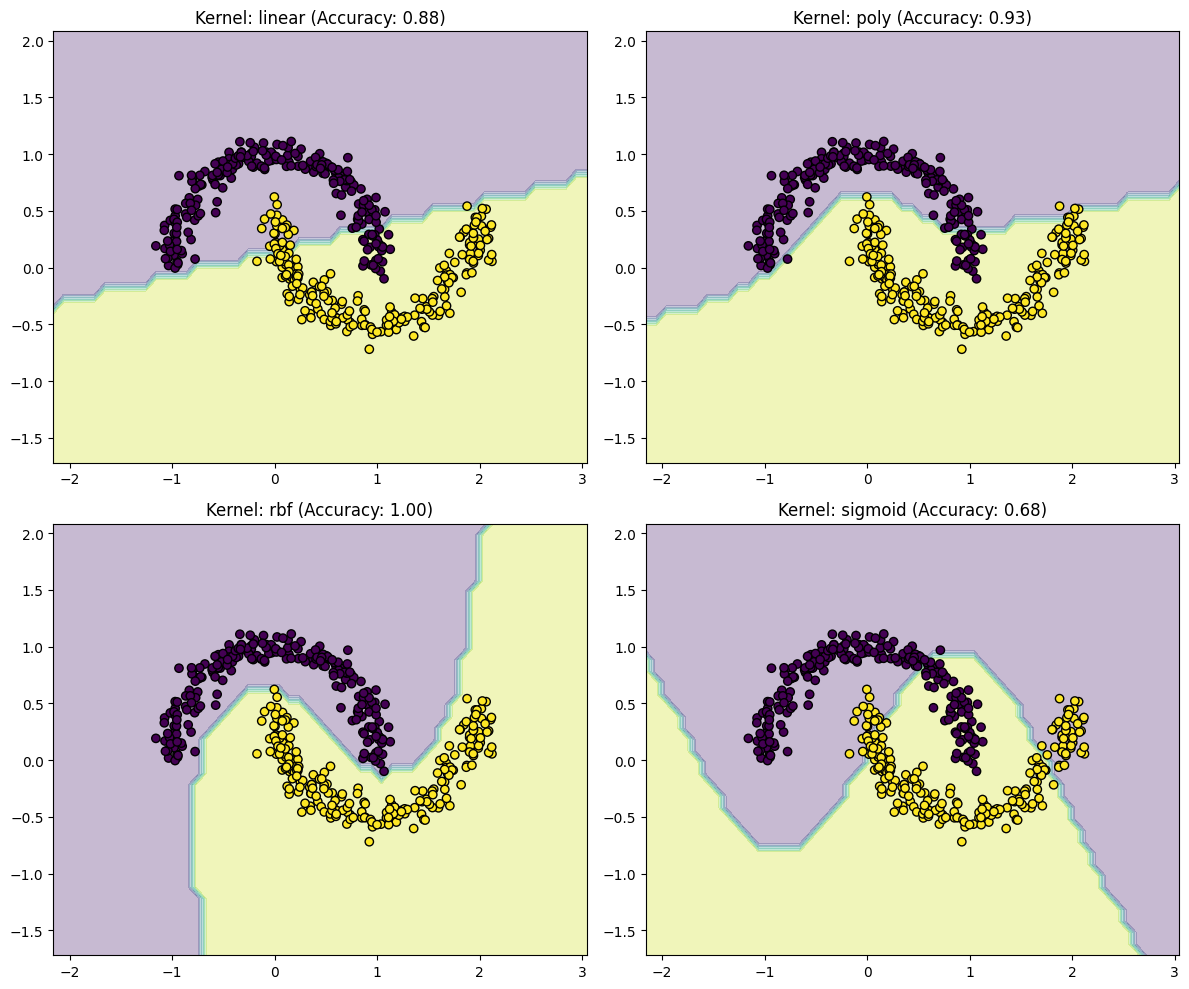

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate the Two Moons dataset
X, y = make_moons(n_samples=1500, noise=0.08)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the kernel functions to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

# Plot the results for each kernel function
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel, gamma='auto')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plot_decision_boundaries(X_test, y_test, svc, axes[i])
    axes[i].set_title(f"Kernel: {kernel} (Accuracy: {accuracy:.2f})")

plt.tight_layout()
plt.show()


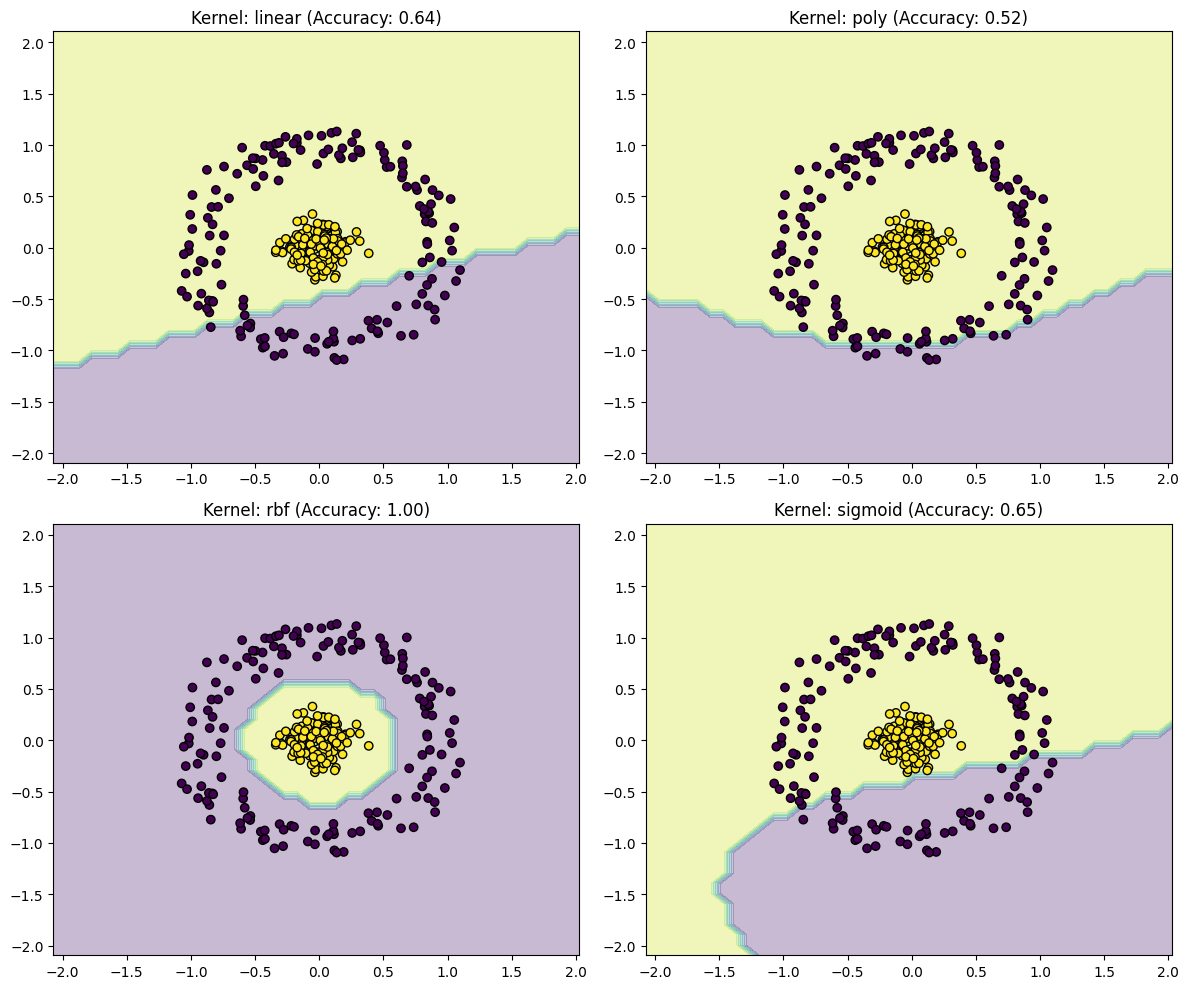

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate the make_circles dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the kernel functions to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

# Plot the results for each kernel function
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, kernel in enumerate(kernels):
    svc = SVC(kernel=kernel, gamma='auto')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plot_decision_boundaries(X_test, y_test, svc, axes[i])
    axes[i].set_title(f"Kernel: {kernel} (Accuracy: {accuracy:.2f})")

plt.tight_layout()
plt.show()
